# RMSProp

RMSProp, which stands for Root Mean Square Propagation, is an adaptive learning rate optimization algorithm designed to address some of the issues encountered with the stochastic gradient descent (SGD) method in training deep neural networks. Advantages of RMSProp: 
- **Adaptive Learning Rates:** By adjusting the learning rate for each parameter, RMSProp can handle different scales of data and varying curvatures of loss functions.
- **Convergence Speed:** RMSProp can converge faster than SGD with momentum, especially in scenarios with noisy or sparse gradients.
- **Stability:** The method avoids the diminishing learning rates found in Adagrad, which can stall the training process in the later stages.

For more information related to the mathematics behind the RMSProp optimizer, you can refer the article: [Understanding RMSprop — faster neural network learning](https://towardsdatascience.com/understanding-rmsprop-faster-neural-network-learning-62e116fcf29a).

## Import libraries

In [1]:
# importing the required libraries
import pandas as pd
import numpy as np
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# check version on pandas
print('Version of pandas:', pd.__version__)
print('Version of numpy:', np.__version__)

Version of pandas: 2.1.1
Version of numpy: 1.26.1


## Create the input and output data

In [2]:
# creating the input array
X = np.array([[1, 0, 1, 0], [1, 0, 1, 1], [0, 1, 0, 1]])

# converting the input in matrix form
X = X.T
print('Input:\n', X)

# shape of input array
print('Shape:', X.shape)

Input:
 [[1 1 0]
 [0 0 1]
 [1 1 0]
 [0 1 1]]
Shape: (4, 3)


In [3]:
# creating the output array
y = np.array([[1], [1], [0]])

# output in matrix form
y = y.T

print('Actual output:\n', y)

# shape of output array
print('Shape:', y.shape)

Actual output:
 [[1 1 0]]
Shape: (1, 3)


In [6]:
# defining the Sigmoid Function
def sigmoid (x):
    return 1/(1 + np.exp(-x))

# defining the hyperparameters of the model
lr = 0.01 # learning rate
inputlayer_neurons = X.shape[0] # number of features in data set
hiddenlayer_neurons = 3 # number of hidden layers neurons
output_neurons = 1 # number of neurons at output layer
epochs = 10000 # number of epochs

# initializing weight
w_ih = np.random.uniform(size=(inputlayer_neurons, hiddenlayer_neurons))
w_ho = np.random.uniform(size=(hiddenlayer_neurons, output_neurons))

# defining the RMSProp parameters
beta = 0.9
u_ih = 0
u_ho = 0

lr_hidden = []
lr_output = []

In [7]:
error_rmsprop = []

for i in range(epochs):
    
    # Forward Propogation
    # hidden layer activations
    hidden_layer_input = np.dot(w_ih.T,X)
    hiddenlayer_activations = sigmoid(hidden_layer_input)    
    
    # calculating the output
    output_layer_input = np.dot(w_ho.T, hiddenlayer_activations)
    output = sigmoid(output_layer_input)
    
    # Backward Propagation
    # calculating error
    error = np.square(y - output)/2
    error_wrt_output = -(y - output)
    output_wrt_Z2 = np.multiply(output, (1-output))
    Z2_wrt_who = hiddenlayer_activations
    
    # rate of change of error w.r.t weight between output and hidden layer
    error_wrt_who = np.dot(Z2_wrt_who,(error_wrt_output*output_wrt_Z2).T)
    Z2_wrt_h1 = w_ho
    h1_wrt_Z1 = np.multiply(hiddenlayer_activations,(1-hiddenlayer_activations))
    Z1_wrt_wih = X
    
    # rate of change of error w.r.t weights between input and hidden layer
    error_wrt_wih = np.dot(Z1_wrt_wih,(h1_wrt_Z1 * np.dot(Z2_wrt_h1, (error_wrt_output * output_wrt_Z2))).T)
    
    # weighted squared gradients
    u_ih = beta * u_ih + (1-beta) * np.square(error_wrt_wih)
    u_ho = beta * u_ho + (1-beta) * np.square(error_wrt_who)
    
    # new learning rates
    new_lr_o = lr / np.sqrt(u_ho.sum())
    new_lr_h = lr / np.sqrt(u_ih.sum())

    # updating the parameters
    w_ho = w_ho - new_lr_o * error_wrt_who
    w_ih = w_ih - new_lr_h * error_wrt_wih
    
    lr_hidden.append(new_lr_h)
    lr_output.append(new_lr_o)
    error_rmsprop.append(np.average(error))

print(error_rmsprop[:10])

[0.11135538335132063, 0.1101272730918615, 0.10927532453890183, 0.10858612603719542, 0.10799242433125229, 0.10746307160650857, 0.10698069996921027, 0.10653447595159271, 0.10611710749635893, 0.10572340487228608]


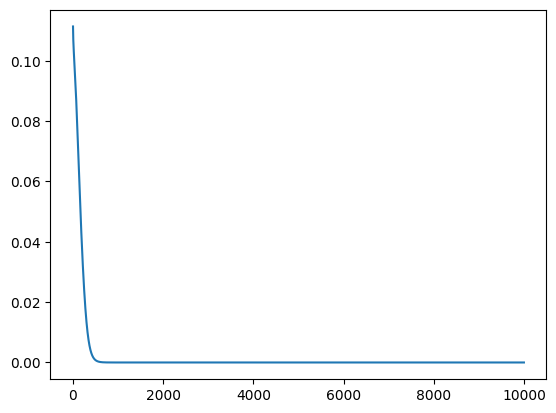

In [9]:
# Visualizing the error after each epoch
plt.plot(np.arange(1,epochs + 1), np.array(error_rmsprop))

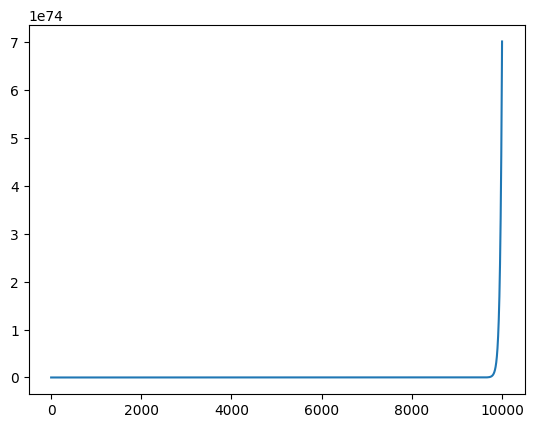

In [10]:
# learning rate after each epochs
plt.plot(np.arange(1,epochs+1), np.array(lr_hidden))

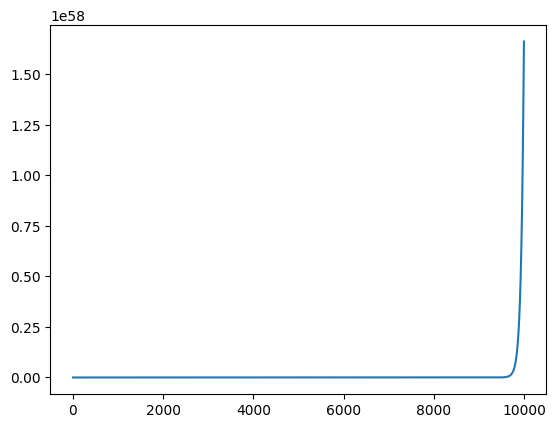

In [11]:
plt.plot(np.arange(1,epochs+1), np.array(lr_output))